In [1]:
# Lochan Basyal || CPE 695 Applied Machine Learning

Question 3 – Programming (20 points):
Design a genetic algorithm to solve the polynomial fitting problem that we did in Homework #1.
You need to implement a genetic algorithm using BOTH mutation AND crossover operations. You
need to decide a mutation rate and a crossover rate.
Plot the following in one figure: 1) the original noisy data, 2) the polynomial you obtained in
Homework #1, and 3) the polynomial obtained from this implementation. Compare and
discussion the difference in performance of the two polynomials obtained with two different
methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
from copy import deepcopy

In [3]:
noise_scale = 100
number_of_samples = 50 
x = 25 *(np.random.rand(number_of_samples,1)-0.5)
y = 5*x + 15*x**2 + 2*x**3 + noise_scale*np.random.randn(number_of_samples,1)

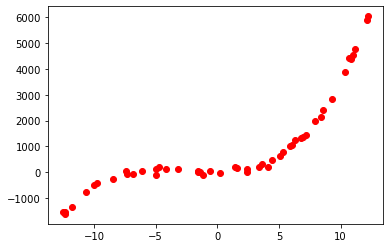

In [4]:
plt.plot(x,y,'ro')
plt.show()

In [5]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

#1. Apply a Polynomial to Dataset

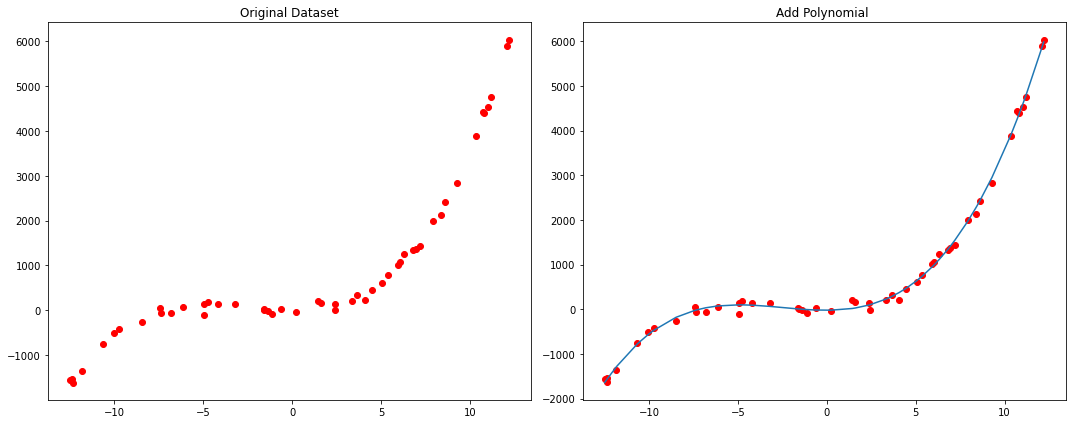

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(x,y, 'ro')
axes[0].set_title("Original Dataset")

coeff = np.polyfit(x,y,3) 
poly = np.poly1d(coeff)
sortMe = np.sort(x) 

axes[1].plot(x,y, 'ro')
axes[1].plot(sortMe, poly(sortMe)) 
axes[1].set_title("Add Polynomial ")

fig.tight_layout()

--- 

#2. Genetic Algorithm

In [7]:
#Creates initial population size
def createPopulation(size):
    chromosomes = []
    for i in range(size): 
        chromosomes.append([random.randint(-50,50) for i in range(4)])
    return chromosomes 

In [8]:
 #Returns 9 new mutated chromosomes from an individual
def mutate(individual):   
    mutations = []
    mutations.append(individual)
    for _ in range(9): 
        new = deepcopy(individual)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0.0,2.0)
        
        new_num = rand_num * rand_float
        new[rand_idx] = new_num
        
        mutations.append(new)
    return mutations

In [9]:
#One point crossover 
def crossover(parent1, parent2): 
    newParent1, newParent2 = [], []
    rand_idx = random.randrange(len(parent1))

    newParent1 = parent1[:rand_idx]+ parent2[rand_idx:]
    newParent2 = parent2[:rand_idx] + parent1[rand_idx:]
    
    return newParent1, newParent2

In [10]:
 #Returns the cost function of a chromosome 
def cost(i, chromosome): 
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]


In [11]:
# Measures a individual/chromosomes's fitness
def fitness(chromosome): 
    badness = 0 
    for i in range(len(x)): 
        pred = cost(i, chromosome)
        yval = y[i]
        badness += (pred - yval)**2

    return (chromosome, round(badness))

In [12]:
#Returns the overall population's best 10 fittest individuals 
def fitnessPopulation(population): 
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        scores = fitness(individual)
        bestGenes.append(scores)
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes 

In [13]:
#main program to operate
def main(): 
 
    num_generations = 500
    bestGenes = []
    
    # create the starting population 
    population = createPopulation(100)

    # iterate through 500 generations 
    for i in range(num_generations): 
        
        new_population = []
        
        # find the top 10 best genes of the population to reproduce 
        bestGenes = fitnessPopulation(population)
        
        newParents = []
        
        # add crossover to parents 
        for k in range(0, len(bestGenes)-1,2): 
            
            parent1, parent2 = crossover(bestGenes[k][0], bestGenes[k+1][0])

            newParents.append(parent1)
            newParents.append(parent2)

        # add mutation to cross-over parents 
        for b in range(len(newParents)): 
            
            newGenes = mutate(newParents[b])
            
            # for each new child, add to new population 
            for j in newGenes: 
                new_population.append(j)
            
        # replace old population with new population 
        population = deepcopy(new_population)
        
    return population 

In [14]:
mostFit = main()

In [15]:
new_coeff = fitnessPopulation(mostFit)[0][0]

In [16]:
new_coeff

[2.0594767383805337,
 15.316409836842835,
 -4.815151462938708e-38,
 -20.102692136566407]

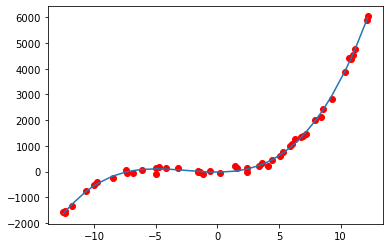

In [17]:
poly = np.poly1d(new_coeff)
plt.plot(x,y, 'ro')
newSorted = np.sort(x) 

plt.plot(newSorted, poly(newSorted)) 
plt.show()

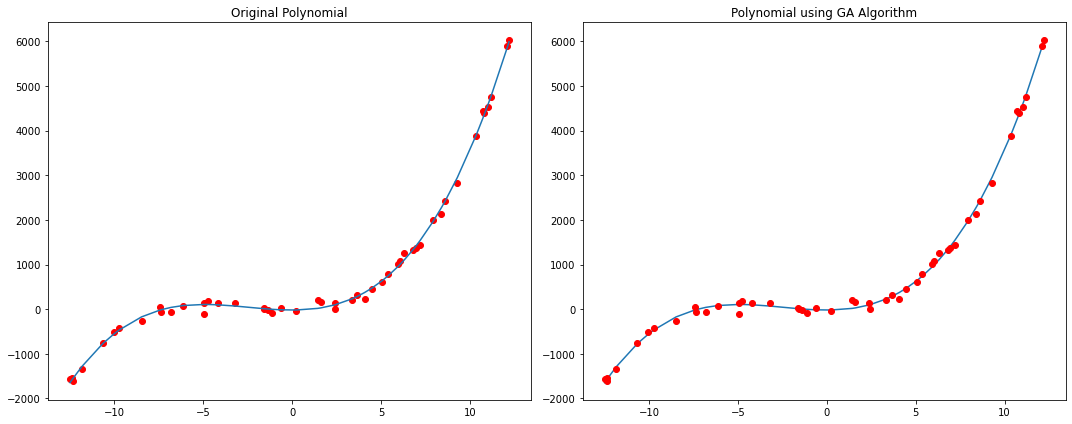

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(x,y, 'ro', label = 'Noisy Data')
axes[0].plot(sortMe, poly(sortMe))
axes[0].set_title("Original Polynomial")


axes[1].plot(newSorted, poly(newSorted))
axes[1].plot(x,y, 'ro', label = 'Noisy Data')
axes[1].set_title("Polynomial using GA Algorithm")

fig.tight_layout()

Analyzing the above graph between polynomials obtained in homework1 and polynomial obtained with genetic algorithm are somewhat similar as shown in the figure above. 